# <span style="color:purple"> Week 4 - Word Embeddings Supplemental -- Exercise 1b
### <span style="color:purple">World of Cooking</span>  
<span style="color:purple">-- File: Jingying (Jane) Bi Homework 4 Supplemental 1b <br>
-- Name: Jingying Bi <br>
-- UCID: 12174556 <br>
<br>
    
<span style="color:purple">**Research Problem:** <br>
How does cooking books change in terms of key words' frequencies? <br>

<span style="color:purple">**Descriptions:** <br>
<span style="color:purple"> I loaded 16 cooking books published between 1857 and 1919. The cooking books from different years may focus on different topics or tell different cooking stories, which partially reflects the culture and history of the time. For instance, the cook books from different years may prefer to using different ingredients or cookware. I hope to study whether these differences could be observed from the corpus. <br>
    
<span style="color:purple">**Limitations of My Analysis & Corpus:** <br>
The changes diplayed on the heatmaps veryly likely tell little about the cooking evelution over the time. Because, these cooking books may focuses on different cultures, such as American domestic cook, Jewish, Swedish, Western cook, etc. Although all of them are American cooking books, the different culture backgrounds may be the biggest reason that yields the key differences among these books. <br>
Therefore, when I try to sort the books by "Year" and try to plot the time series of word changes, those changes may be just reflecting the different culture/ content behind them, very little related to the time variant dynamics. <br> For instance, I see "fish" changes much in 1884/ 1886. This may be merely caused by the 1884/ 1886 books talk much (little) about fish, given other books talking little (much) about fish. Or it could be that 1884/ 1886 books talk very dinstinct receipes about cooking fish, etc. <br>

    
<span style="color:purple">**Future Research:**    
To tackel the problems mentioned in the **Limitations of My Analysis & Corpus:**, I need to collect more books, to make sure that the topics, the underlying cultures are evenly distributed among the books instead of being a specific feature of certain books. <br>
Moreover, I could apply the same tenique on other corpus. For instance, the word changes could be studied before-during-after financial crisis, and see what people discussed most, and how their discussions get affected by the crisis and change over time. <br>
    
<span style="color:purple">**Dataset:** <br>
<span style="color:purple">The Feeding America: The Historic American Cookbook dataset contains transcribed and encoded text from 76 influential American cookbooks. Features encoded within the text include but are not limited to recipes, types of recipes, cooking implements, and ingredients. The texts were chosen among more than 7000 cookbooks as representative of periods and themes in American cookbook history spanning the late 18th to early 20th century. <br>

<span style="color:purple">**Citation:** <br>
<span style="color:purple">Feeding America: The Historic American Cookbook Dataset. East Lansing: Michigan State University Libraries Special Collections. https://www.lib.msu.edu/feedingamericadata/
    
![title](../4-Word-Embedding/CookBook.jpg)

### <span style="color:purple"> 1.1 Load Packages

In [18]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import nltk #For stop words and stemmers
import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA
import copy
import re #for regexs

#gensim uses a couple of deprecated features
#we can't do anything about them so lets ignore them 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

### <span style="color:purple"> 1.2 Load Corpus with information book titles, years, etc.

In [80]:
# Load corpora 
CookBookDF = lucem_illud.loadTextDirectory('../4-Word-Embedding/CookBooks')

# Load booklist
with open('../4-Word-Embedding/cookbook_titlelist.txt') as f:
    Book_list = f.read()
    
# split the text by paragraph    
Book_list = re.split('\\n',Book_list)   

# extract the information of year for each book in CookBookDF
BookYear = []
BookTitle = []
for j in range(0, len(CookBookDF)):
    text = CookBookDF.index[j]
    title = re.sub('\.txt', '', text)
    BookTitle.append(title)
    for i in range(0,len(Book_list)):
        if re.search(title, Book_list[i]) is not None:
            year = re.findall('\d+', Book_list[i])[0]
            BookYear.append(year)
            #print('the book ' + title + ' is published in year ' + year)

CookBookDF['Year'] = BookYear  
CookBookDF['Title'] = BookTitle

In [108]:
CookBookDF

,text,Year,Title,tokenized_sents,normalized_sents
The Neighborhood Cook Book.txt,\n \n \n \n The Neighborhood Cook Book \n Cou...,1914,The Neighborhood Cook Book,"[[The, Neighborhood, Cook, Book, Council, of, ...","[[neighborhood, cook, book, council, jewish, w..."
Miss Corson's Practical American Cookery.txt,\n \n \n \n Miss Corson's Practical American ...,1886,Miss Corson's Practical American Cookery,"[[Miss, Corson, 's, Practical, American, Cooke...","[[miss, corson, practical, american, cookery, ..."
Svensk-Amerikansk Kokbok.txt,\n \n \n Svensk-Amerikansk Kokbok. Swedish-E...,1897,Svensk-Amerikansk Kokbok,"[[Svensk-Amerikansk, Kokbok, .], [Swedish-Engl...","[[kokbok], [cookbook], [author, unknown, cooke..."
Food and Cookery for the Sick and Convalescent.txt,\n \n \n \n Food and cookery for the sick and...,1904,Food and Cookery for the Sick and Convalescent,"[[Food, and, cookery, for, the, sick, and, con...","[[food, cookery, sick, convalescent], [farmer,..."
Jennie June's American Cookery Book.txt,\n \n \n \n The House Servant's Directory... ...,1870,Jennie June's American Cookery Book,"[[The, House, Servant, 's, Directory, ..., Rob...","[[house, servant, directory, roberts, robert],..."
The Great Western Cook Book.txt,"\n \n \n \n The Great Western Cook Book, or ...",1857,The Great Western Cook Book,"[[The, Great, Western, Cook, Book, ,, or, Tabl...","[[great, western, cook, book, table, receipts,..."
Domestic Cookery.txt,"\n \n \n \n \n Domestic Cookery, Useful Rece...",1860,Domestic Cookery,"[[Domestic, Cookery, ,, Useful, Receipts, ,, a...","[[domestic, cookery, useful, receipts, hints, ..."
Mary at the Farm and Book of Recipes.txt,\n \n \n Mary at the Farm and Book of Recipe...,1915,Mary at the Farm and Book of Recipes,"[[Mary, at, the, Farm, and, Book, of, Recipes,...","[[mary, farm, book, recipes, thomas, edith, ge..."
Dishes & Beverages of the Old South.txt,\n \n \n \n Dishes &amp; Beverages of the Ol...,1913,Dishes & Beverages of the Old South,"[[Dishes, &, amp, ;, Beverages, of, the, Old, ...","[[dishes, amp, beverages, old, south], [martha..."
The International Jewish Cook Book.txt,\n \n \n \n The International Jewish Coo...,1919,The International Jewish Cook Book,"[[The, International, Jewish, Cook, Book, ...,...","[[international, jewish, cook, book, greenbaum..."


### <span style="color:purple"> 1.3 Tokenize sentences for each book

In [85]:
# Tokenize the sentences and normalize them
CookBookDF['tokenized_sents'] = CookBookDF['text'].apply(lambda x: [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
CookBookDF['normalized_sents'] = CookBookDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, stopwordLst = lucem_illud.stop_words_basic) for s in x])


### <span style="color:purple"> 2.1 Functions for embedding operatios

In [90]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed

def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

# We will be creating many embeddings so we have created this function to do most of the work. 
# It creates two collections of embeddings, one the original and one the aligned.
def compareModels(df, category, sort = True):
    """If you are using time as your category sorting is important"""
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF['normalized_sents'].sum())
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned


In [91]:
# run the function compareModels
rawEmbeddings, comparedEmbeddings = compareModels(CookBookDF, 'Year')

### <span style="color:purple"> 2.2 Compare cook books across all permutions 
#### <span style="color:purple"> 2.2.1The word changes over the year
<span style="color:purple"> We need to compare them across all permutions so we will define another function to help, we will be using 1 - cosine similarity as that gives a more intitive range of 0-2 with low values meaning little change and high meaning lots of change

In [97]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis = 0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pandas.DataFrame(dists, index = cats)

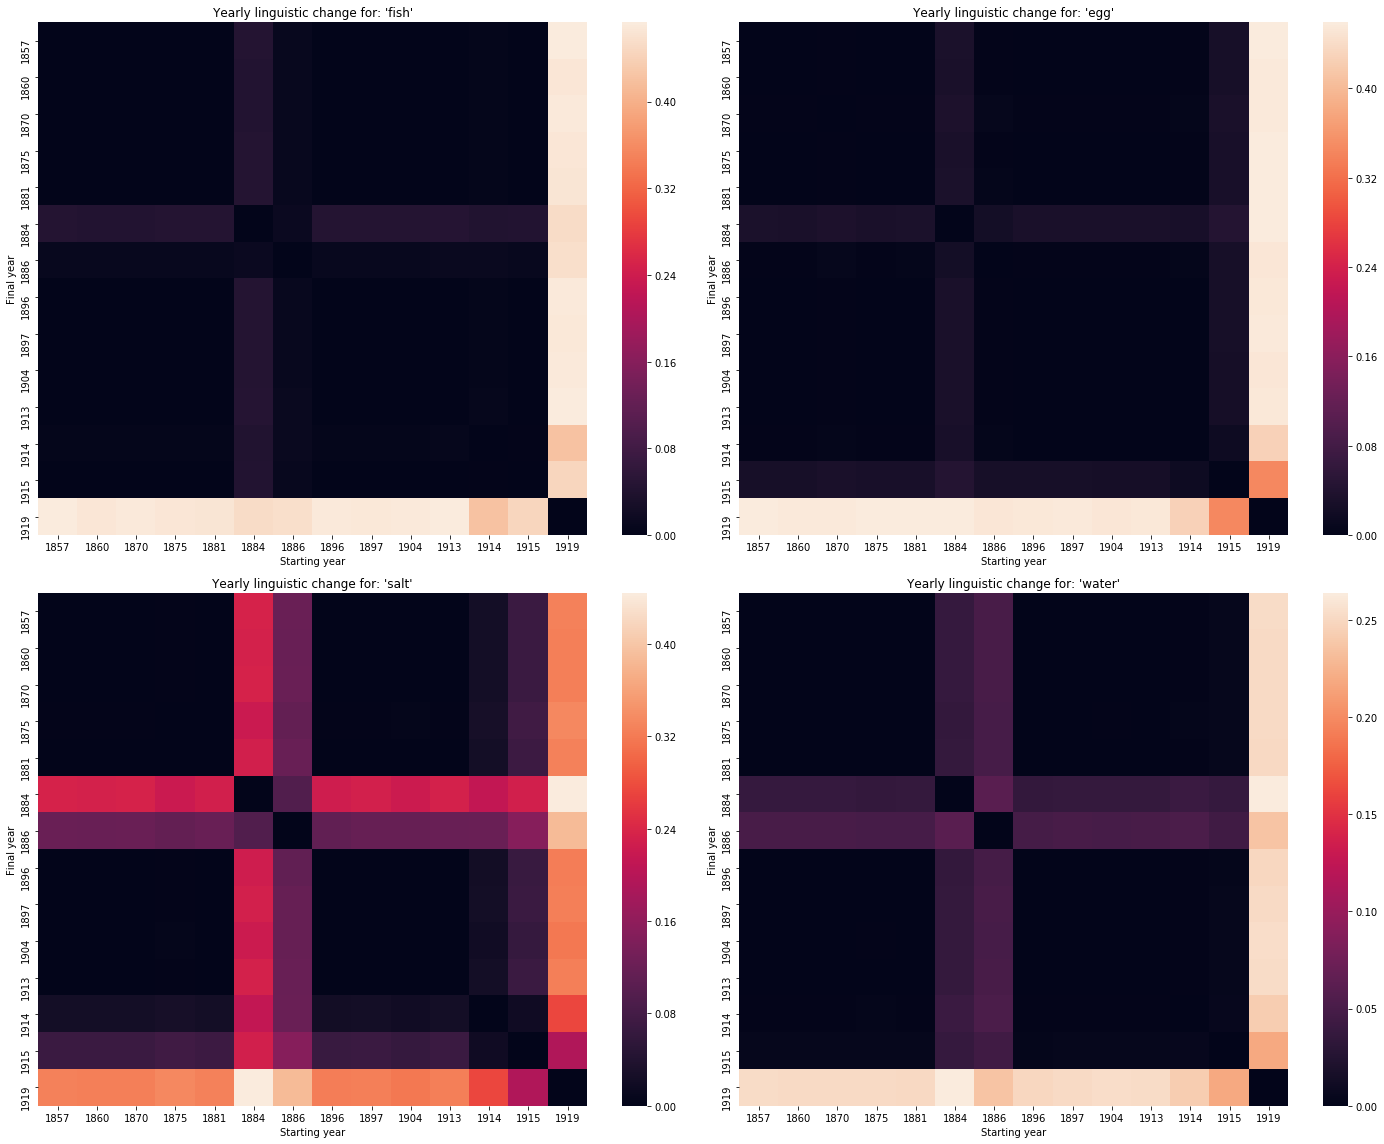

In [146]:
targetWord_1 = 'fish'
targetWord_2 = 'egg'
targetWord_3 = 'salt'
targetWord_4 = 'water'

plt.figure(figsize = (20,16))

ax = plt.subplot(221)
pltDF = getDivergenceDF(targetWord_1, comparedEmbeddings)
#fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord_1))

ax = plt.subplot(222)
pltDF = getDivergenceDF(targetWord_2, comparedEmbeddings)
#fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord_2))

ax = plt.subplot(223)
pltDF = getDivergenceDF(targetWord_3, comparedEmbeddings)
#fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord_3))

ax = plt.subplot(224)
pltDF = getDivergenceDF(targetWord_4, comparedEmbeddings)
#fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord_4))

plt.tight_layout()
plt.show()

#### <span style="color:purple"> 2.2.2 The word changes most over the year
<span style="color:purple"> We can also ask which words changed the most

In [115]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))
    
    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0][word], axis = 0), np.expand_dims(embed[word], axis = 0))[0,0])
    return sum(dists)

def findMostDivergent(embeddingsDict):
    words = []
    for embeds in embeddingsDict.values():
        for embed in embeds:
            words += list(embed.wv.vocab.keys())
    words = set(words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)

def findLeastDivergent(embeddingsDict):
    words = []
    for embeds in embeddingsDict.values():
        for embed in embeds:
            words += list(embed.wv.vocab.keys())
    words = set(words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=False)
    

In [116]:
wordDivergences_Most = findMostDivergent(comparedEmbeddings)
wordDivergences_Least = findLeastDivergent(comparedEmbeddings)

Found 177 words to compare
Found 177 words to compare


In [117]:
wordDivergences_Most[:10]

[('salad', 0.9523616507649422),
 ('lamb', 0.8644467443227768),
 ('beef', 0.7893652021884918),
 ('cheese', 0.7821773290634155),
 ('salt', 0.7805147767066956),
 ('ice', 0.7725916504859924),
 ('pepper', 0.7709103226661682),
 ('cake', 0.7660249769687653),
 ('jelly', 0.7550331354141235),
 ('boiled', 0.7525786757469177)]

In [118]:
wordDivergences_Least[:10]

[('liquor', 0.05835765600204468),
 ('first', 0.07224875688552856),
 ('quantity', 0.07666248083114624),
 ('part', 0.07783907651901245),
 ('good', 0.08593469858169556),
 ('best', 0.08969676494598389),
 ('spoon', 0.09184277057647705),
 ('taking', 0.098857581615448),
 ('get', 0.1117626428604126),
 ('every', 0.11481714248657227)]

In [121]:
wordDivergences_Most[-10:]

[('every', 0.11481714248657227),
 ('get', 0.1117626428604126),
 ('taking', 0.098857581615448),
 ('spoon', 0.09184277057647705),
 ('best', 0.08969676494598389),
 ('good', 0.08593469858169556),
 ('part', 0.07783907651901245),
 ('quantity', 0.07666248083114624),
 ('first', 0.07224875688552856),
 ('liquor', 0.05835765600204468)]

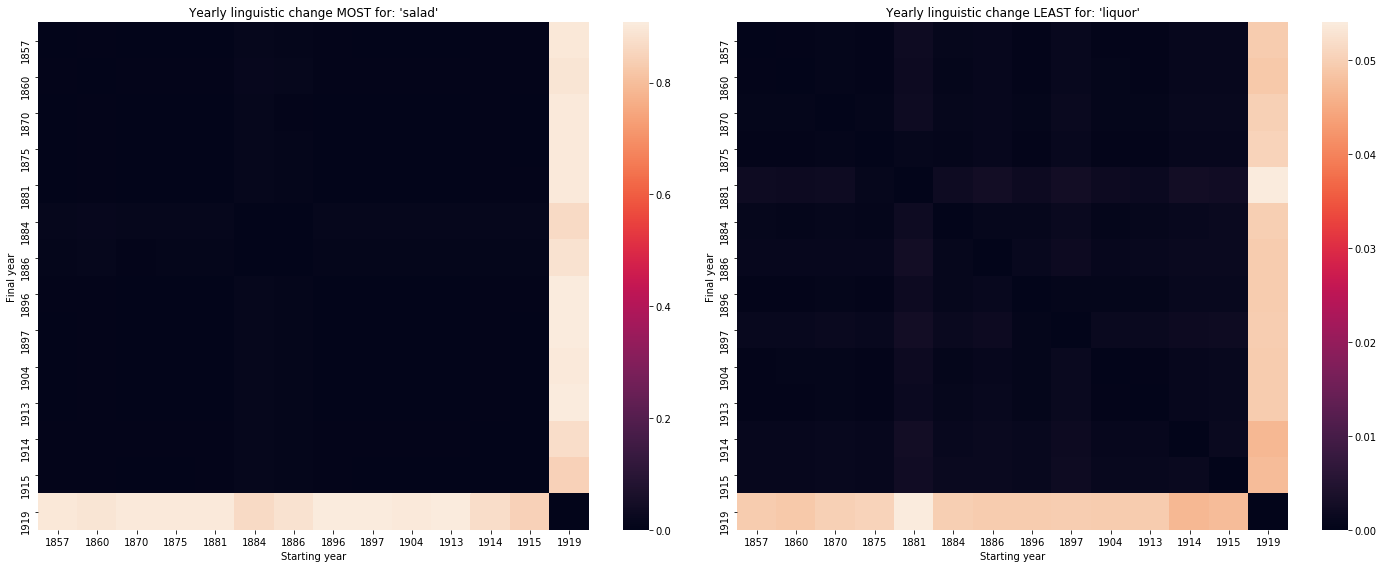

In [147]:
targetWord_most = wordDivergences_Most[0][0]
targetWord_least = wordDivergences_Most[-1][0]

plt.figure(figsize = (20,8))

ax = plt.subplot(121)
pltDF = getDivergenceDF(targetWord_most, comparedEmbeddings)
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change MOST for: '{}'".format(targetWord_most))

ax = plt.subplot(122)
pltDF = getDivergenceDF(targetWord_least, comparedEmbeddings)
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change LEAST for: '{}'".format(targetWord_least))

plt.tight_layout()
plt.show()

<span style="color:purple"> **Findings:** <br>
All the heatplots show a common characteristic, two bright strips during the year 1919. This may reflect the 1919 is a year with breakthroughs in the cooking world where many changes happen. However, this could also be a totally outlier due to the books unique content. There are three books from 1919, namely The International Jewish Cook Book, The Hotel St. Francis Cook Book, and The Italian Cook Book. <br>
So I hope to analyze again over a sub DataFrame by removing the three 1919 books. <br>

<span style="color:purple"> **Findings after removing 1919:** <br>
For the heating maps of MOST and LEAST changes word, the two filtered words are still "salad" (MOST) and "liquor" (LEAST), which is consistent with the corpus before removing 1919. However, the patterns look totally different. More variations have been captured in the corpus without 1919. This tells that the 1919 text could be so distinct and unique that it tends to *crowd out* refined changes over the other years, yielding a rather dark heatmap with only two bright stjrips on 1919. In addition to the color/ pattern changes, the scale of the divergence reduces dramatically as well, which substantiate my conjecture of 1919's crowd out effect, as seen below. 

### <span style="color:purple"> 2.3 Compare cook books across all permutions -- without 1919 books

In [129]:
CookBookDF_no1919 = CookBookDF[CookBookDF.Year != '1919']

In [132]:
# run the function compareModels
rawEmbeddings_no1919, comparedEmbeddings_no1919 = compareModels(CookBookDF_no1919, 'Year')

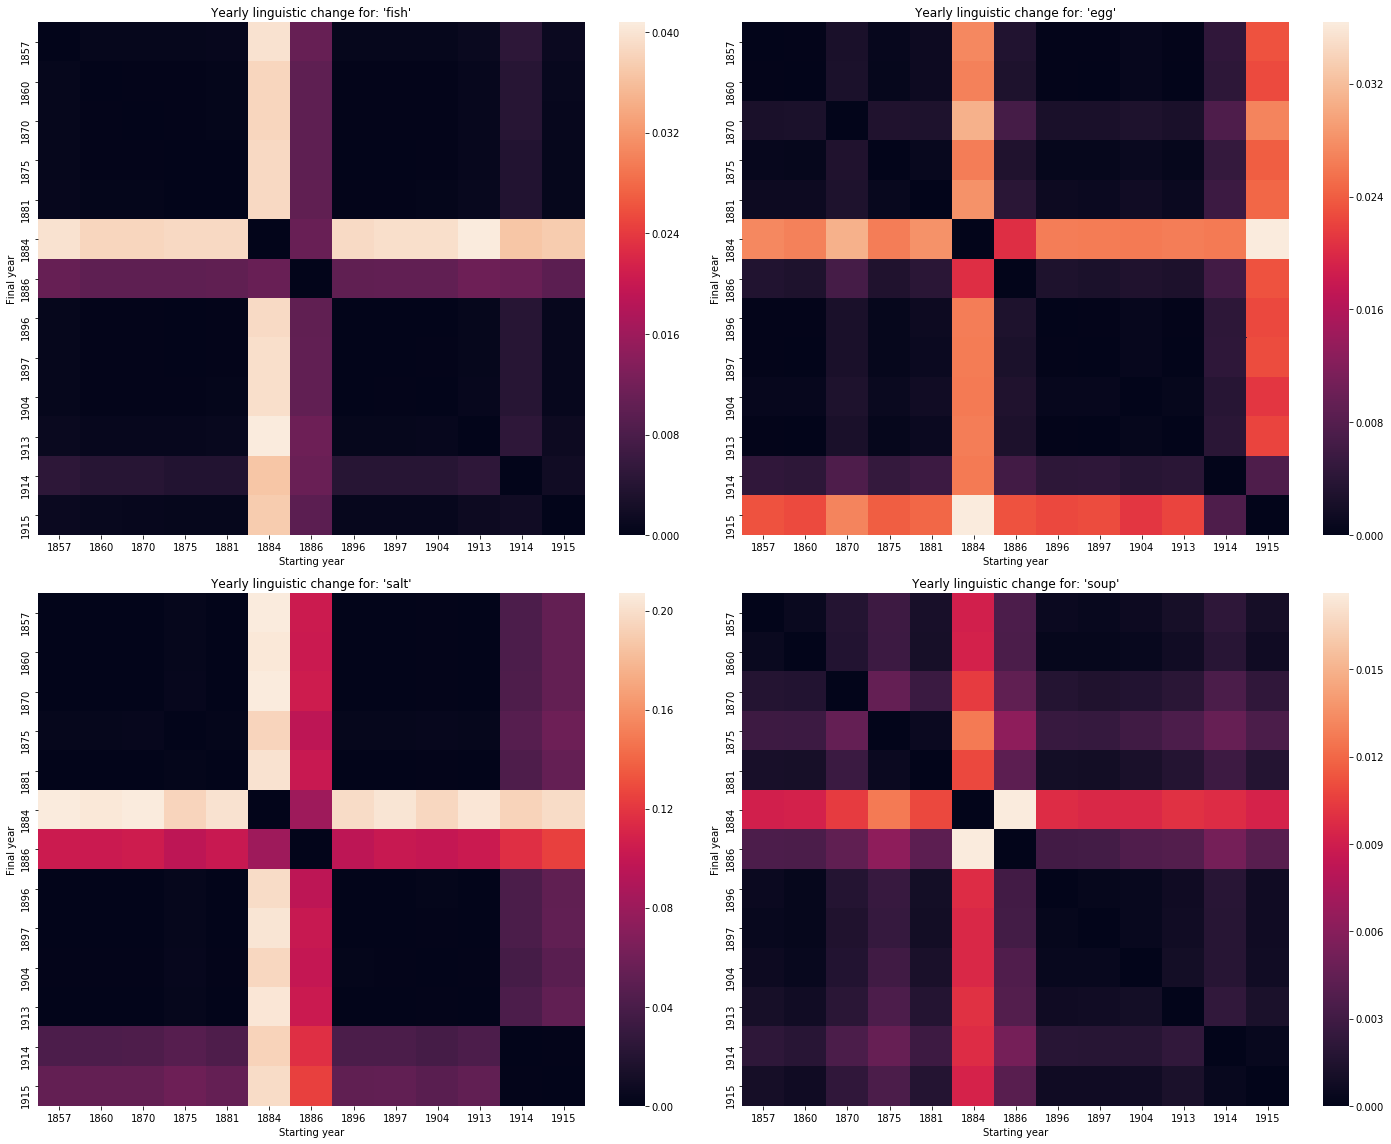

In [150]:
targetWord_1 = 'fish'
targetWord_2 = 'egg'
targetWord_3 = 'salt'
targetWord_4 = 'soup'

plt.figure(figsize = (20,16))

ax = plt.subplot(221)
pltDF = getDivergenceDF(targetWord_1, comparedEmbeddings_no1919)
#fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord_1))

ax = plt.subplot(222)
pltDF = getDivergenceDF(targetWord_2, comparedEmbeddings_no1919)
#fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord_2))

ax = plt.subplot(223)
pltDF = getDivergenceDF(targetWord_3, comparedEmbeddings_no1919)
#fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord_3))

ax = plt.subplot(224)
pltDF = getDivergenceDF(targetWord_4, comparedEmbeddings_no1919)
#fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord_4))

plt.tight_layout()
plt.show()

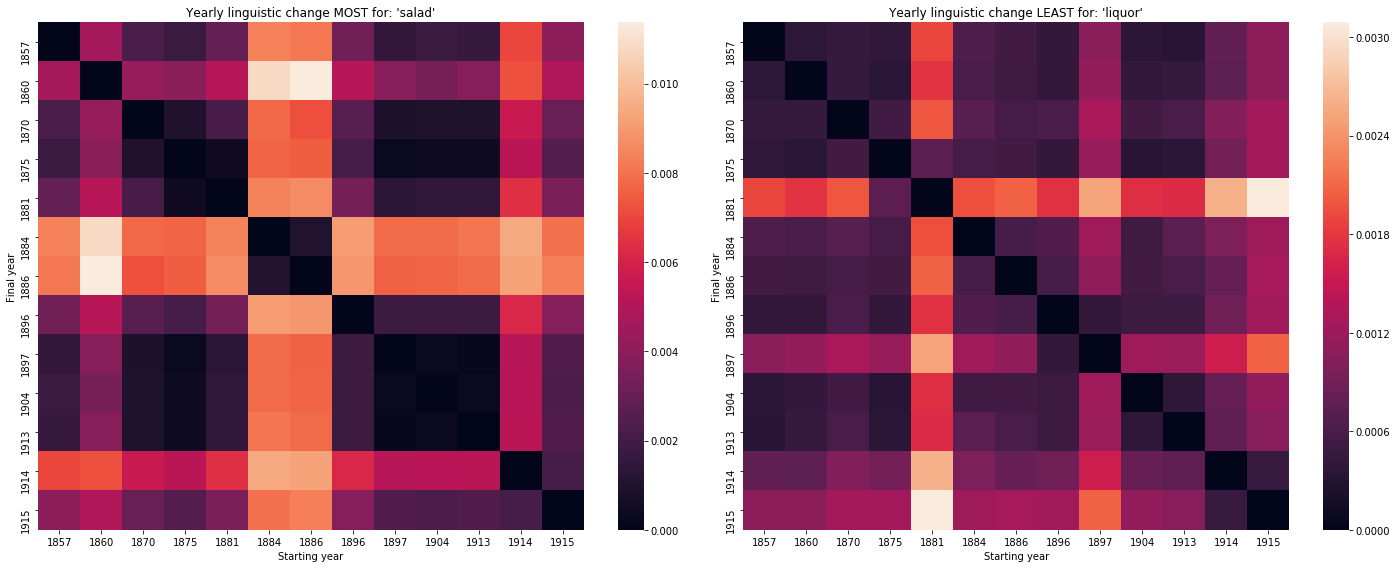

In [149]:
targetWord_most = wordDivergences_Most[0][0]
targetWord_least = wordDivergences_Most[-1][0]

plt.figure(figsize = (20,8))

ax = plt.subplot(121)
pltDF = getDivergenceDF(targetWord_most, comparedEmbeddings_no1919)
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change MOST for: '{}'".format(targetWord_most))

ax = plt.subplot(122)
pltDF = getDivergenceDF(targetWord_least, comparedEmbeddings_no1919)
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change LEAST for: '{}'".format(targetWord_least))

plt.tight_layout()
plt.show()

<span style="color:purple"><span style="color:purple">*----------------END----------------* <br>
<span style="color:purple">February 7th, 2018 at Regenstein Library <br>
<span style="color:purple">Jingying Bi <br>